<a href="https://colab.research.google.com/github/Jenarth/SCS3250-Group-2-Final-Project/blob/master/Rough%20Work/MS_Final_Dataset_10thApril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification with knn

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import holidays
import matplotlib.pyplot as plt

##Read Final Dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv')
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488


##Prepare Dataset for Classification

For classification, we will focus our analysis on one station - Union. We will be selecting specific columns to use as attributes to predict the category in which our test data will fall.

###Removing outliers and holidays

The first step is to remove all outliers and holidays from the dataset to have uniform data

In [3]:
#only keep values without outliers/holidays
dataset  = dataset.loc[(-dataset.Holiday)&(-dataset.Outlier)]
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488


In [4]:
dataset["Union Station Ridership"].max()

116029

In [5]:
dataset["Union Station Ridership"].min()

5736

###Creating bins for Union Ridership

For efficient classification, the Union ridership will be split into 16 ranges of equal sized bins (10,000 bin size) ranging from min of 0 to max of 160,000

In [6]:
#create bins for union ridership
ridership_bins = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000] #try with smaller bins
ridership_labels = ['0 to 10000','10000 to 20000','20000 to 30000','30000 to 40000','40000 to 50000','50000 to 60000','60000 to 70000','70000 to 80000','80000 to 90000','90000 to 100000','100000 to 110000','110000 to 120000','120000 to 130000','130000 to 140000','140000 to 150000','150000 to 160000']
dataset['Union Station Ridership Ranges'] = pd.cut(dataset['Union Station Ridership'], bins=ridership_bins, labels=ridership_labels)
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000


In [7]:
dataset['Union Station Ridership Ranges'].unique()

[90000 to 100000, 80000 to 90000, 10000 to 20000, 0 to 10000, 70000 to 80000, 100000 to 110000, 20000 to 30000, 110000 to 120000]
Categories (8, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 70000 to 80000 <
                         80000 to 90000 < 90000 to 100000 < 100000 to 110000 < 110000 to 120000]

Text(0, 0.5, 'Frequency')

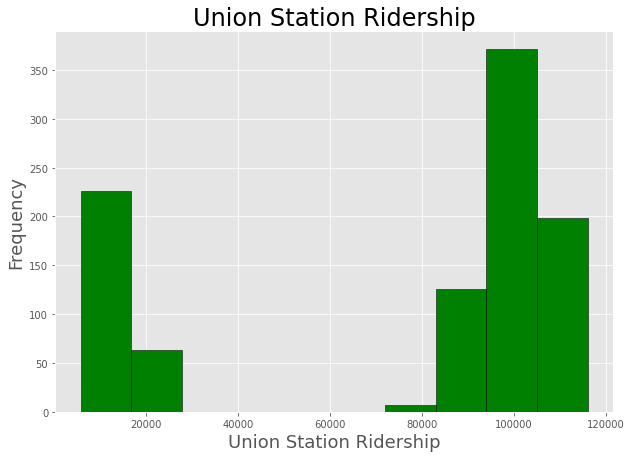

In [8]:
#plot to see distribution of Union ridership
plt.style.use('ggplot')

dataset["Union Station Ridership"].plot(kind='hist', color='green', edgecolor='black', figsize=(10,7))
plt.title('Union Station Ridership', size=24)
plt.xlabel('Union Station Ridership', size=18)
plt.ylabel('Frequency', size=18)

###Distribution of Delta Temperature

Text(0, 0.5, 'Frequency')

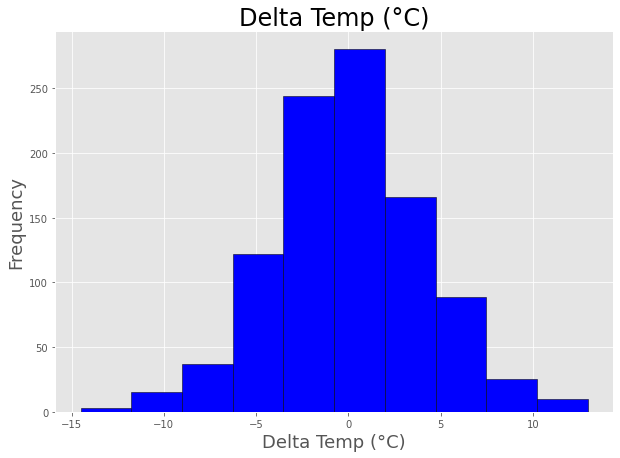

In [9]:
dataset["Delta Temp (°C)"].plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Delta Temp (°C)', size=24)
plt.xlabel('Delta Temp (°C)', size=18)
plt.ylabel('Frequency', size=18)

###Distribution of Delta Precipitation

Text(0, 0.5, 'Frequency')

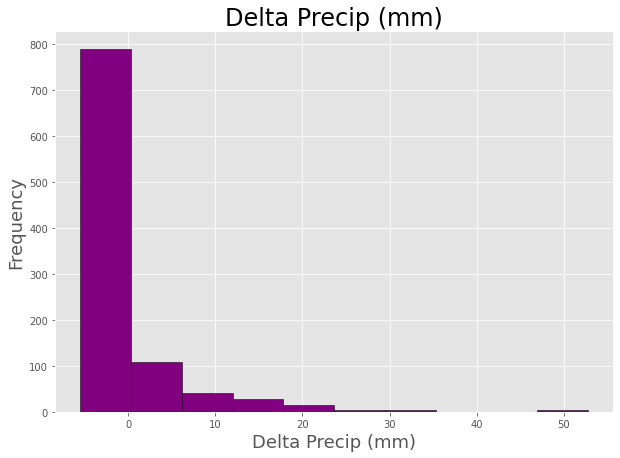

In [10]:
dataset["Delta Precip (mm)"].plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Delta Precip (mm)', size=24)
plt.xlabel('Delta Precip (mm)', size=18)
plt.ylabel('Frequency', size=18)

###Preparing the weekday column for knn

Since knn only takes floats as attributes, the weekdays will be changed to a numeric value in numerical order, i.e. Sunday = 1, Monday = 2, Tuesday = 3, and so on.

In [11]:
#change weekdays to numbers

def CategorizeByWeekday(x):
    if x['Weekday']=='Sunday':
      val = 1
    elif x['Weekday']=='Monday':
      val = 2
    elif x['Weekday']=='Tuesday':
      val = 3
    elif x['Weekday']=='Wednesday':
      val = 4
    elif x['Weekday']=='Thursday':
      val = 5
    elif x['Weekday']=='Friday':
      val = 6
    elif x['Weekday']=='Saturday':
      val = 7            
    else:
      val = "None"
    return val

dataset["Weekday"] = dataset.apply(CategorizeByWeekday, axis = 1)

dataset

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,4,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,5,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,6,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,7,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,1,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2020-02-25,2020,2,2020-02,25,3,False,5.6,1.7,3.7,-1.906897,5.606897,0.2,2.137931,-1.937931,0.0,13650,15097,29727,36973,17192,6865,10485,99431,229420,False,226142.086667,260553.155725,191731.017608,90000 to 100000
1092,2020-02-26,2020,2,2020-02,26,4,False,4.1,-3.2,0.4,-1.906897,2.306897,11.8,2.137931,9.662069,0.0,12596,13557,26690,33732,14331,6215,9749,98193,215063,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1093,2020-02-27,2020,2,2020-02,27,5,False,-2.7,-5.3,-4.0,-1.906897,-2.093103,3.1,2.137931,0.962069,0.0,11349,13074,26818,34180,15281,5522,9151,94998,210373,False,224966.615894,253295.696280,196637.535508,90000 to 100000
1094,2020-02-28,2020,2,2020-02,28,6,False,-2.5,-9.4,-5.9,-1.906897,-3.993103,1.1,2.137931,-1.037931,0.0,11098,13008,27785,34263,14426,5629,8759,95108,210076,False,204211.905405,232457.905320,175965.905490,90000 to 100000


###Creation of master dataset for knn

To create a master dataset for knn classification, a copy of the original dataset was created ONLY with the relevant columns for attributes and category.

Attribute columns:
1. Month
2. Weekday
3. Delta Temp
4. Delta Precipitation

Category column:
1. Union Station Ridership Range

In [12]:
#create dataset for knn
knn_dataset = dataset[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)","Union Station Ridership Ranges"]].copy()
knn_dataset

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
0,2017-03-01,3,4,5.851613,16.064516,90000 to 100000
1,2017-03-02,3,5,-3.648387,-2.135484,90000 to 100000
2,2017-03-03,3,6,-5.948387,-2.335484,80000 to 90000
3,2017-03-04,3,7,-8.948387,-2.135484,10000 to 20000
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000
...,...,...,...,...,...,...
1091,2020-02-25,2,3,5.606897,-1.937931,90000 to 100000
1092,2020-02-26,2,4,2.306897,9.662069,90000 to 100000
1093,2020-02-27,2,5,-2.093103,0.962069,90000 to 100000
1094,2020-02-28,2,6,-3.993103,-1.037931,90000 to 100000


In [13]:
#convert ridership to category
knn_dataset["Union Station Ridership Ranges"] = knn_dataset["Union Station Ridership Ranges"].astype('category')
knn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 1095
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Date                            991 non-null    object  
 1   Month                           991 non-null    int64   
 2   Weekday                         991 non-null    int64   
 3   Delta Temp (°C)                 991 non-null    float64 
 4   Delta Precip (mm)               991 non-null    float64 
 5   Union Station Ridership Ranges  991 non-null    category
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 48.2+ KB


## knn predict for June 2019

In [14]:
X = knn_dataset[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)"]]
X.head()

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm)
0,2017-03-01,3,4,5.851613,16.064516
1,2017-03-02,3,5,-3.648387,-2.135484
2,2017-03-03,3,6,-5.948387,-2.335484
3,2017-03-04,3,7,-8.948387,-2.135484
4,2017-03-05,3,1,-5.248387,-2.335484


###Convert attribute columns to floats

In [15]:
cols = ['Month', 'Weekday', 'Delta Temp (°C)', 'Delta Precip (mm)']
for col in cols:
   X[col] = X[col].apply(lambda x: float(x) if x == x else "")
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm)
0,2017-03-01,3.0,4.0,5.851613,16.064516
1,2017-03-02,3.0,5.0,-3.648387,-2.135484
2,2017-03-03,3.0,6.0,-5.948387,-2.335484
3,2017-03-04,3.0,7.0,-8.948387,-2.135484
4,2017-03-05,3.0,1.0,-5.248387,-2.335484
...,...,...,...,...,...
1091,2020-02-25,2.0,3.0,5.606897,-1.937931
1092,2020-02-26,2.0,4.0,2.306897,9.662069
1093,2020-02-27,2.0,5.0,-2.093103,0.962069
1094,2020-02-28,2.0,6.0,-3.993103,-1.037931


In [16]:
y = knn_dataset["Union Station Ridership Ranges"]
y.head()

0    90000 to 100000
1    90000 to 100000
2     80000 to 90000
3     10000 to 20000
4         0 to 10000
Name: Union Station Ridership Ranges, dtype: category
Categories (16, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 30000 to 40000 < ... <
                          120000 to 130000 < 130000 to 140000 < 140000 to 150000 < 150000 to 160000]

###Separating the data manually to use June 2019 as testing set and the rest for training set

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#use June 2019 as test data

X_train_1 = X.loc[(X['Date']>"2017-03-01") & (X['Date']<"2019-06-01")]
X_train_2 = X.loc[(X['Date']>"2019-06-30") & (X['Date']<"2020-03-01")]
X_train = pd.concat([X_train_1, X_train_2], ignore_index=True, sort =False)
X_train.drop('Date', axis=1, inplace=True)
X_train

,Month,Weekday,Delta Temp (°C),Delta Precip (mm)
0,3.0,5.0,-3.648387,-2.135484
1,3.0,6.0,-5.948387,-2.335484
2,3.0,7.0,-8.948387,-2.135484
3,3.0,1.0,-5.248387,-2.335484
4,3.0,2.0,-9.548387,-2.335484
...,...,...,...,...
956,2.0,3.0,5.606897,-1.937931
957,2.0,4.0,2.306897,9.662069
958,2.0,5.0,-2.093103,0.962069
959,2.0,6.0,-3.993103,-1.037931


In [18]:
X_test = X.loc[(X['Date']>"2019-05-31") & (X['Date']<"2019-07-01")]
X_test.drop('Date', axis=1, inplace=True)
X_test.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(29, 4)

In [19]:
y_train_1 = y.loc[(X['Date']>"2017-03-01") & (X['Date']<"2019-06-01")]
y_train_2 = y.loc[(X['Date']>"2019-06-30") & (X['Date']<"2020-03-01")]
y_train = pd.concat([y_train_1, y_train_2], ignore_index=True, sort =False)
y_train.shape

(961,)

In [20]:
y_test = y.loc[(X['Date']>"2019-05-31") & (X['Date']<"2019-07-01")]
y_test.shape

(29,)

###Initial knn predict run with 5 neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
y_hat

array(['10000 to 20000', '10000 to 20000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '90000 to 100000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '90000 to 100000', '100000 to 110000', '90000 to 100000',
       '90000 to 100000', '90000 to 100000', '10000 to 20000',
       '10000 to 20000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '80000 to 90000', '10000 to 20000',
       '0 to 10000', '100000 to 110000', '100000 to 110000',
       '100000 to 110000', '90000 to 100000', '100000 to 110000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

In [22]:
y_test

822      10000 to 20000
823      10000 to 20000
824    100000 to 110000
825    100000 to 110000
826    100000 to 110000
827    100000 to 110000
828     90000 to 100000
829      10000 to 20000
830      10000 to 20000
831    100000 to 110000
832    100000 to 110000
833    100000 to 110000
834    100000 to 110000
835     90000 to 100000
836      10000 to 20000
837      10000 to 20000
839    100000 to 110000
840    100000 to 110000
841    100000 to 110000
842     90000 to 100000
843      10000 to 20000
844      10000 to 20000
845    100000 to 110000
846    100000 to 110000
847    100000 to 110000
848    100000 to 110000
849      80000 to 90000
850      10000 to 20000
851      10000 to 20000
Name: Union Station Ridership Ranges, dtype: category
Categories (16, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 30000 to 40000 < ... <
                          120000 to 130000 < 130000 to 140000 < 140000 to 150000 < 150000 to 160000]

In [23]:
accuracy_score(y_test,y_hat)

0.6551724137931034

###Identify optimal number of neighbours

In [0]:
neighbors = range(1,100)
error = []
score = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_hat))

In order to identify the optimal number of neighbours for this model, we plotted the number of neighbours against the accuracy score

Text(0, 0.5, 'Accuracy Score')

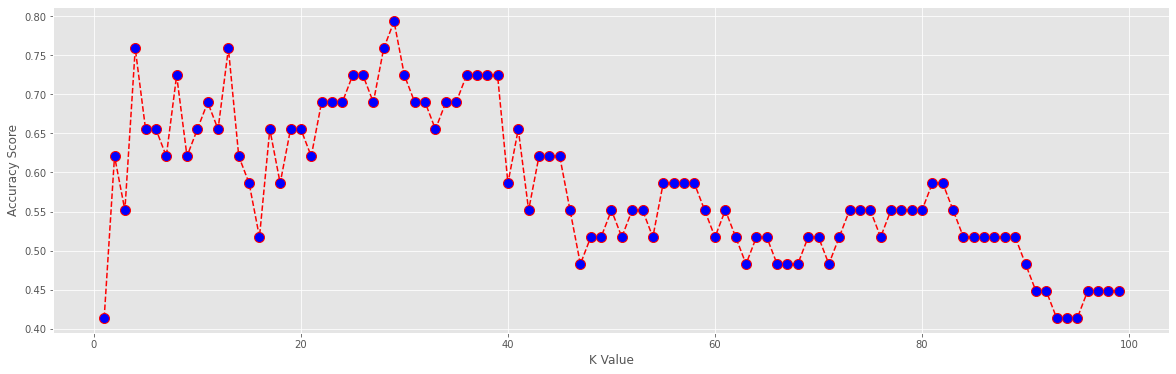

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(neighbors, score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

The optimal number of neighbors was 9 based on the plot, which gave an accuracy score of 75.8%




In [26]:
knn = KNeighborsClassifier(n_neighbors=29) #best score
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.7931034482758621

In [27]:
dataset.head()

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Monthly Mean Temp (°C),Delta Temp (°C),Total Precip (mm),Monthly Mean Precip (mm),Delta Precip (mm),Snow on Grnd (cm),Barrie Ridership,Kitchener Ridership,Lakeshore East Ridership,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below,Union Station Ridership Ranges
0,2017-03-01,2017,3,2017-03,1,4,False,13.1,-1.9,5.6,-0.251613,5.851613,18.4,2.335484,16.064516,0.0,10022,13585,25273,32909,15599,5639,8804,95802,207633,False,227296.503311,254365.810172,200227.196451,90000 to 100000
1,2017-03-02,2017,3,2017-03,2,5,False,-1.3,-6.4,-3.9,-0.251613,-3.648387,0.2,2.335484,-2.135484,0.5,9932,13331,26120,33884,15653,5665,8736,95873,209194,False,224966.615894,253295.696280,196637.535508,90000 to 100000
2,2017-03-03,2017,3,2017-03,3,6,False,-4.3,-8.1,-6.2,-0.251613,-5.948387,0.0,2.335484,-2.335484,0.5,8905,12235,23801,31473,14092,5129,7918,87200,190753,False,204211.905405,232457.905320,175965.905490,80000 to 90000
3,2017-03-04,2017,3,2017-03,4,7,False,-6.5,-11.9,-9.2,-0.251613,-8.948387,0.2,2.335484,-2.135484,0.5,928,480,7872,11756,208,0,246,13899,35389,False,45352.333333,73886.656469,16818.010198,10000 to 20000
4,2017-03-05,2017,3,2017-03,5,1,False,-0.4,-10.6,-5.5,-0.251613,-5.248387,0.0,2.335484,-2.335484,0.5,803,398,4714,8381,169,0,156,8505,23126,False,32455.370861,53039.519234,11871.222488,0 to 10000


## knn predict for Mondays

In [28]:
knn_dataset = dataset[["Date","Month","Weekday","Delta Temp (°C)","Delta Precip (mm)","Union Station Ridership Ranges"]].copy()
knn_dataset.head()

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
0,2017-03-01,3,4,5.851613,16.064516,90000 to 100000
1,2017-03-02,3,5,-3.648387,-2.135484,90000 to 100000
2,2017-03-03,3,6,-5.948387,-2.335484,80000 to 90000
3,2017-03-04,3,7,-8.948387,-2.135484,10000 to 20000
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000


In [29]:
knn_dataset_M = knn_dataset.loc[knn_dataset["Weekday"]==1]
knn_dataset_M.head()

,Date,Month,Weekday,Delta Temp (°C),Delta Precip (mm),Union Station Ridership Ranges
4,2017-03-05,3,1,-5.248387,-2.335484,0 to 10000
11,2017-03-12,3,1,-7.948387,-2.335484,0 to 10000
18,2017-03-19,3,1,3.651613,-2.335484,10000 to 20000
25,2017-03-26,3,1,4.151613,0.064516,0 to 10000
32,2017-04-02,4,1,0.963333,-3.586667,0 to 10000


In [30]:
knn_dataset_M["Union Station Ridership Ranges"] = knn_dataset_M["Union Station Ridership Ranges"].astype('category')
knn_dataset_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 4 to 1089
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Date                            143 non-null    object  
 1   Month                           143 non-null    int64   
 2   Weekday                         143 non-null    int64   
 3   Delta Temp (°C)                 143 non-null    float64 
 4   Delta Precip (mm)               143 non-null    float64 
 5   Union Station Ridership Ranges  143 non-null    category
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 7.6+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
X = knn_dataset_M[["Month","Weekday","Delta Temp (°C)","Delta Precip (mm)"]]
X.shape

(143, 4)

In [32]:
cols = ['Month', 'Weekday', 'Delta Temp (°C)', 'Delta Precip (mm)']
for col in cols:
   X[col] = X[col].apply(lambda x: float(x) if x == x else "")
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 4 to 1089
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              143 non-null    float64
 1   Weekday            143 non-null    float64
 2   Delta Temp (°C)    143 non-null    float64
 3   Delta Precip (mm)  143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
y = knn_dataset_M["Union Station Ridership Ranges"]
y.shape

(143,)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train.shape

(114, 4)

In [35]:
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test)
y_hat

array(['10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

In [36]:
y_test

501     10000 to 20000
361         0 to 10000
851     10000 to 20000
494     10000 to 20000
746     10000 to 20000
592         0 to 10000
417         0 to 10000
270         0 to 10000
998     10000 to 20000
977         0 to 10000
676         0 to 10000
662     10000 to 20000
221     10000 to 20000
368         0 to 10000
424     10000 to 20000
529     10000 to 20000
263     10000 to 20000
627     10000 to 20000
144         0 to 10000
4           0 to 10000
284         0 to 10000
81          0 to 10000
515     10000 to 20000
795         0 to 10000
396     10000 to 20000
711         0 to 10000
11          0 to 10000
1047        0 to 10000
942     10000 to 20000
Name: Union Station Ridership Ranges, dtype: category
Categories (16, object): [0 to 10000 < 10000 to 20000 < 20000 to 30000 < 30000 to 40000 < ... <
                          120000 to 130000 < 130000 to 140000 < 140000 to 150000 < 150000 to 160000]

In [37]:
accuracy_score(y_test,y_hat)

0.4827586206896552

In [38]:
neighbors = range(1,60)
error = []
score = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_hat))
y_hat

array(['10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000', '10000 to 20000',
       '10000 to 20000', '10000 to 20000'], dtype=object)

Text(0, 0.5, 'Accuracy Score')

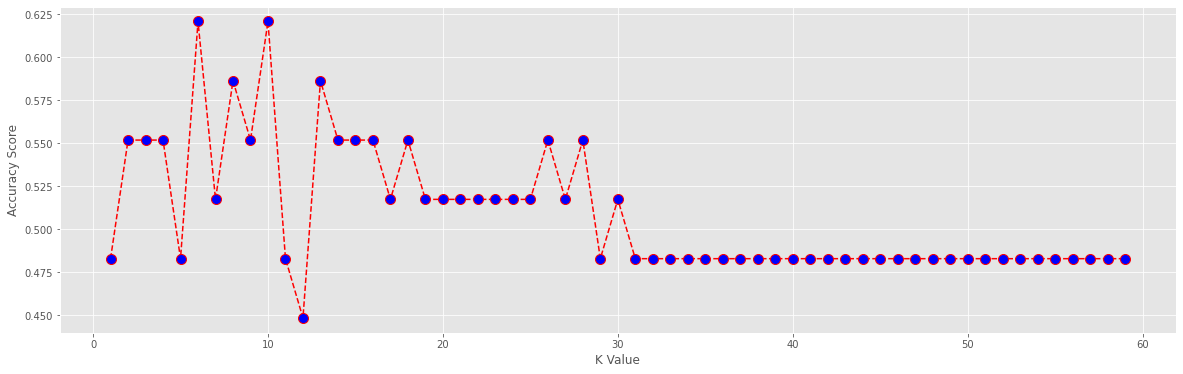

In [39]:
plt.figure(figsize=(20, 6))
plt.plot(neighbors, score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [40]:
knn = KNeighborsClassifier(n_neighbors=6) #best score
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)
score = accuracy_score(y_test, y_hat)
score

0.6206896551724138